# Background
The dataset for this project was generated from Python using numpy library. The variable names have been purposfully given unintelligible names to make the dataset seem "anonymous". The goal here is to predict the target class in this "anonymized" data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('KNN_Project_Data')

In [4]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Standardize the Variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [15]:
data_feat = pd.DataFrame(scaled_features,columns=(data.columns[:-1]))
data_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X = data_feat
y = data['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions

In [22]:
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value

In [26]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

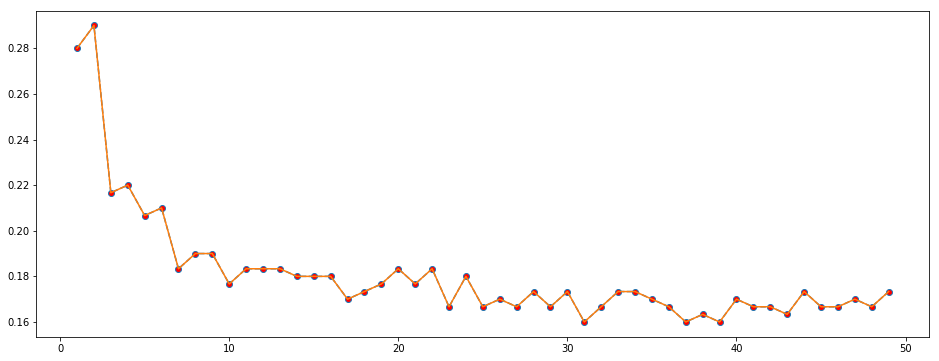

In [32]:
plt.figure(figsize = (16,6))
plt.plot(range(1, 50), error_rate, linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 6)
plt.plot(range(1,50),error_rate)

## Retrain with new K Value

In [28]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[123  29]
 [ 19 129]]


# Conclusion

The classification report shows that the model is good at recognizing both class 0 class 1. The overall accuracy of the model is 85%.

* Out of the total predicted class 1, the model accurately predicted 82% of the values.
* Out of the total predicted class 0, the model accurately predicted 87% of the values.
* The model's accuracy was 87% in predicting class 1
* The model's accuracy was 81% in predicting class 0